<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/Time_Series/Times_Series_Analysis_Edureka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Times Series Analysis


## Topics Covered in Today's Training

- Why Time Series Analysis?
- What is Time Series?
- Components of Time Series
- When not to use Time Series?
- What is Stationarity?
- ARIMA model
- Demo: Forecast future


### Why Time Series Analysis?

- In this analysis, you just have one variables - TIME

- You can analyse this time series data in order to extract meaningful statistics and other characteristics


### What Is Time Series? 

- A time series is a set of observation taken at specified **times** usually at equal intervals

- It is udes to **predict** the future values based on the **previous** observed values 

 - Business Forecasting 
 - Understand past behavior 
 - Plan future 
 - Evaluate current accomplishment
 

### Components Of Time Series

- Trend
- Seasonality 
- Irregularity 
- Cyclic 


### When Not To Use Time Series Analysis

- Values are constant
- Values in the form of functions 


### What is Stationarity?

TS has a particular behaviour over time, there is a very high probability that it will follow the same in the **future**

**How to remove Stationarity**
- Constant mean
- Constant Variance
- Autocovariance that does not depend on time

#### Tests to Check Stationarity 

|Rolling Statistics|ADCF Test|
|------------------|---------|
|Plot the **moving average** or moving **variance** and see if varies with time. More of a **visual** technique|Null hypothesis is that the TS is non-stationary. The test results comprise of a **Test Statistic** and some **Critical Values**|

### What is ARIMA model?

AR + I + MA 

- AR: Auto Regressive (P=Autoregressive lags)
- I: Integration (d=order of differentation)
- MA: Moving Average (Q=moving average) 



#### Problem Statement 

Build a model to forecast the demand (passenger traffic) in Airplanes. The data is classified in date/time and the passengers travellin per month.

|Month|Passengers|
|--------|-------|
|1949-01-01|  112|
|1949-02-01|  118|
|1949-03-01|  132|
|1949-04-01|  129|
|1949-05-01|  121|
|1949-06-01|  135|

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10, 6

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [ ]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


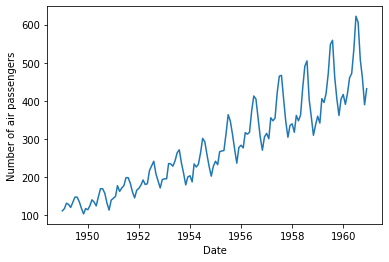

In [ ]:
# plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

In [ ]:
rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


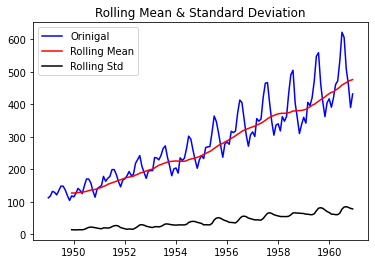

In [ ]:
# plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Orinigal')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
# perform dickey.fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
for key, value in dftest[4].items():
  dfoutput[f'Critical value {key}'] = value

print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of observations Used    130.000000
Critical value 1%               -3.481682
Critical value 5%               -2.884042
Critical value 10%              -2.578770
dtype: float64


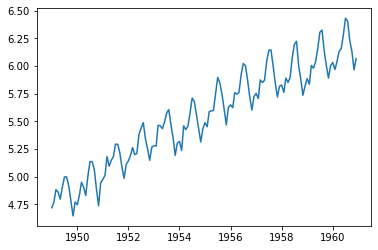

In [ ]:
# Estimating trend
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

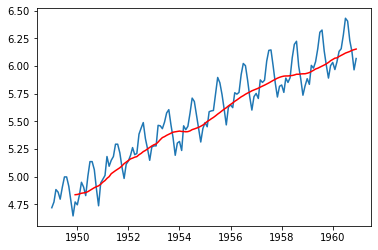

In [ ]:
movingAverage = indexedDataset_logscale.rolling(window=12).mean()
movingSTD = indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage, color='red')

In [ ]:
datasetLogScaleMinusMovingAverage = indexedDataset_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  # Determining rolling statistic 
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()

  # plot rolling statistics:
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot(movingSTD, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  # Perform Dickey-Fuller Test
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
  dfoutput = pd.Series(dftest[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput[f'Critical values {key}'] = value
  print(dfoutput)

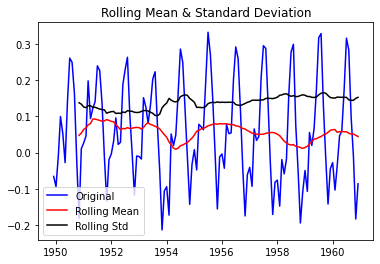

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical values 1%              -3.486535
Critical values 5%              -2.886151
Critical values 10%             -2.579896
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

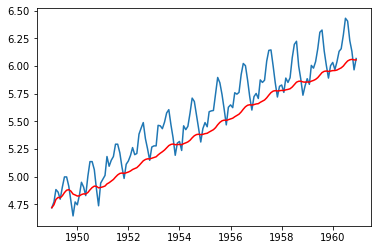

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color='red')

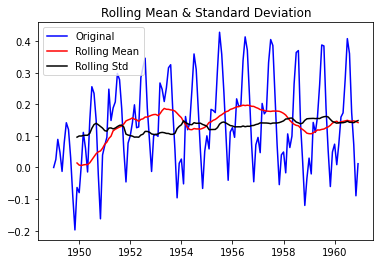

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical values 1%              -3.481682
Critical values 5%              -2.884042
Critical values 10%             -2.578770
dtype: float64


In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logscale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

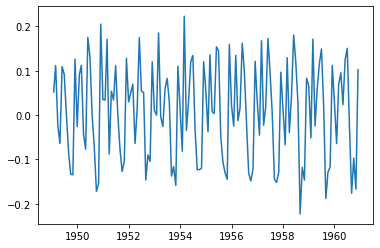

In [ ]:
datasetLogDiffShifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

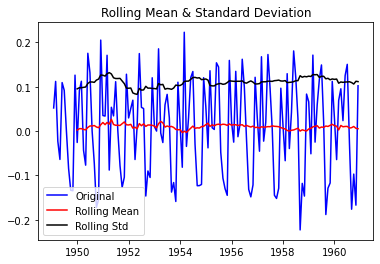

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical values 1%              -3.482501
Critical values 5%              -2.884398
Critical values 10%             -2.578960
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

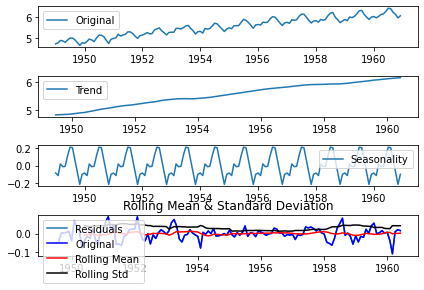

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical values 1%            -3.485122e+00
Critical values 5%            -2.885538e+00
Critical values 10%           -2.579569e+00
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411)
plt.plot(indexedDataset_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual 
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)



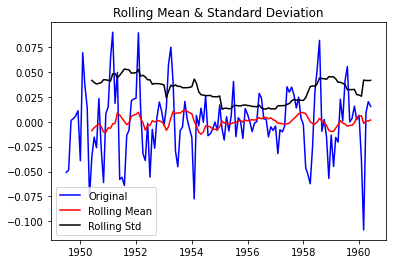

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical values 1%            -3.485122e+00
Critical values 5%            -2.885538e+00
Critical values 10%           -2.579569e+00
dtype: float64


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


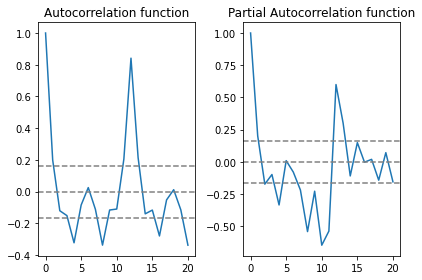

In [ ]:
# ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf 

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

# plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation function')

# plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation function')

plt.tight_layout()





/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR mdoel


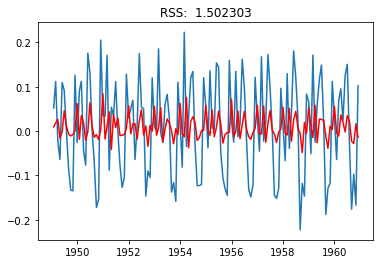

In [ ]:
from statsmodels.tsa.arima_model import ARIMA 

# AR model
model = ARIMA(indexedDataset_logscale, order=(2, 1, 0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: % 4f' % sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR mdoel')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA mdoel


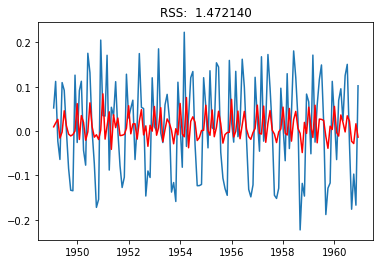

In [ ]:
# MA model
model = ARIMA(indexedDataset_logscale, order=(0, 1, 2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: % 4f' % sum((results_MA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print('Plotting MA mdoel')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA mdoel


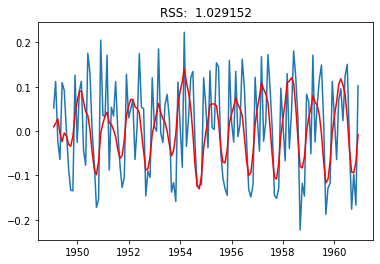

In [ ]:
# ARIMA model
model = ARIMA(indexedDataset_logscale, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: % 4f' % sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA mdoel')

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [ ]:
# Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['#Passengers'].iloc[0], index=indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

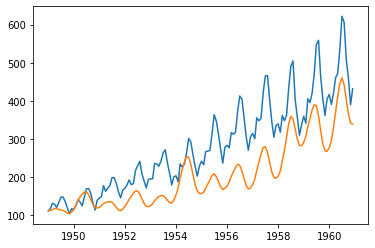

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [ ]:
indexedDataset_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


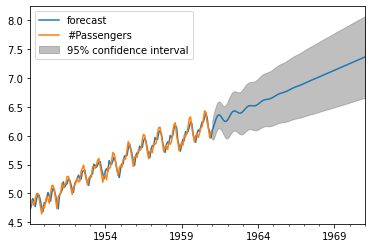

In [ ]:
results_ARIMA.plot_predict(1, 264)
x=results_ARIMA.forecast(steps=120)

In [ ]:
x[1]

array([0.08384711, 0.10749461, 0.11568692, 0.11702772, 0.11703494,
       0.11744015, 0.11762247, 0.11778711, 0.1202416 , 0.12736039,
       0.13870955, 0.15118786, 0.16157805, 0.16834385, 0.17177318,
       0.17311971, 0.17358721, 0.17385448, 0.17430206, 0.1754332 ,
       0.17788136, 0.18195711, 0.18726205, 0.1928338 , 0.1976923 ,
       0.20130624, 0.20369039, 0.20519816, 0.20625253, 0.20720983,
       0.20836955, 0.21000311, 0.21229728, 0.21524462, 0.21860163,
       0.22198239, 0.22503046, 0.22755276, 0.22954788, 0.23114779,
       0.23253806, 0.23390515, 0.23541291, 0.23718293, 0.23926519,
       0.24161518, 0.24410351, 0.24656337, 0.24885235, 0.25089608,
       0.25269712, 0.25431606, 0.2558429 , 0.25737206, 0.25898368,
       0.26072828, 0.26261526, 0.26461067, 0.26664876, 0.26865458,
       0.27056825, 0.27236073, 0.27403677, 0.2756275 , 0.27717805,
       0.27873502, 0.28033567, 0.28199994, 0.28372658, 0.28549485,
       0.28727185, 0.2890232 , 0.29072311, 0.29236057, 0.29394

In [ ]:
len(x[1])

120

In [ ]:
np.exp(x[1])

array([1.08746262, 1.11348486, 1.12264434, 1.12415059, 1.12415871,
       1.12461432, 1.12481938, 1.12500458, 1.12776929, 1.13582628,
       1.14879039, 1.16321516, 1.1753642 , 1.18334343, 1.18740848,
       1.18900843, 1.18956442, 1.1898824 , 1.19041509, 1.19176238,
       1.19468358, 1.19956274, 1.20594326, 1.21268122, 1.21858738,
       1.22299925, 1.22591854, 1.22776834, 1.22906354, 1.23024068,
       1.23166825, 1.23368189, 1.23651543, 1.24016523, 1.24433547,
       1.24854939, 1.25236087, 1.25552368, 1.2580311 , 1.26004544,
       1.26179847, 1.26352464, 1.26543117, 1.26767299, 1.27031536,
       1.27330411, 1.27647645, 1.27962026, 1.28255265, 1.28517652,
       1.28749326, 1.28957933, 1.29154981, 1.29352631, 1.29561266,
       1.29787496, 1.30032633, 1.30292361, 1.30558179, 1.30820318,
       1.31070905, 1.31306058, 1.31526317, 1.31735705, 1.31940127,
       1.32145714, 1.32357402, 1.32577863, 1.32806976, 1.33042023,
       1.33278649, 1.3351227 , 1.33739422, 1.33958595, 1.34170